In [1]:
import os

from lib.input.load import load_sequences, load_labels
from lib.model import LSTM, protCNN
from lib.output.save import save_history
from lib.output.plot import plot_history

'''
My solution of the assignment follows the procedure described in 'Protein Sequence Classification.
A case study on the Pfam dataset to classify protein families.' by Ronak Vijay available at
https://towardsdatascience.com/protein-sequence-classification-99c80d0ad2df.
'''

In [2]:
'''
The data files and label files in the correct format can be generated with the accompanying script "split_data.py".
'''
DATA_FOLDER = "apoptosis_damage"

TRAIN_PATH = DATA_FOLDER + "/train.fasta"
TEST_PATH = DATA_FOLDER + "/test.fasta"
VALIDATE_PATH = DATA_FOLDER + "/validate.fasta"

TRAIN_LABELS_PATH = DATA_FOLDER + "/train_labels.txt"
TEST_LABELS_PATH = DATA_FOLDER + "/test_labels.txt"
VALIDATE_LABELS_PATH = DATA_FOLDER + "/validate_labels.txt"

In [3]:
'''
Experiment settings.
The individual NNs are configured in "lib/model/LTSM.py" and "lib/model/protCNN.py".
'''
MODEL = LSTM # LSTM or protCNN
MAX_SEQUENCE_LENGTH = 100
TRAIN_EPOCHS = 33 # 33 for LSTM, 10 for protCNN
BATCH_SIZE = 256

RUN_NAME = DATA_FOLDER + "_" + \
    ("LSTM" if MODEL == LSTM else "protCNN") + \
    "_l" + str(MAX_SEQUENCE_LENGTH) + \
    "_e" + str(TRAIN_EPOCHS) +\
    "_b" + str(BATCH_SIZE)
HISTORY_PATH = "./results/" + RUN_NAME + "_trainHistoryDict"

In [4]:
train = load_sequences(TRAIN_PATH, MAX_SEQUENCE_LENGTH,
                       categorical=MODEL == protCNN)
train_labels = load_labels(TRAIN_LABELS_PATH)
test = load_sequences(TEST_PATH, MAX_SEQUENCE_LENGTH,
                      categorical=MODEL == protCNN)
test_labels = load_labels(TEST_LABELS_PATH)

model = MODEL.init_model(MAX_SEQUENCE_LENGTH, train_labels.shape[1])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          2688      
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 101,762
Trainable params: 101,762
Non-trainable params: 0
_______________________________________________________

In [5]:
history = model.fit(x=train,
                    y=train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=TRAIN_EPOCHS,
                    validation_data=(test, test_labels))

Epoch 1/33
8/8 [==============================] - 14s 913ms/step - loss: 6.3136 - accuracy: 0.5467 - val_loss: 5.8144 - val_accuracy: 0.5545
Epoch 2/33
8/8 [==============================] - 5s 608ms/step - loss: 5.4879 - accuracy: 0.5563 - val_loss: 5.0645 - val_accuracy: 0.5545
Epoch 3/33
8/8 [==============================] - 5s 643ms/step - loss: 4.7884 - accuracy: 0.5563 - val_loss: 4.4339 - val_accuracy: 0.5545
Epoch 4/33
8/8 [==============================] - 6s 768ms/step - loss: 4.2036 - accuracy: 0.5578 - val_loss: 3.9108 - val_accuracy: 0.5545
Epoch 5/33
8/8 [==============================] - 6s 744ms/step - loss: 3.7201 - accuracy: 0.5588 - val_loss: 3.4802 - val_accuracy: 0.5545
Epoch 6/33
8/8 [==============================] - 6s 729ms/step - loss: 3.3225 - accuracy: 0.5588 - val_loss: 3.1273 - val_accuracy: 0.5545
Epoch 7/33
8/8 [==============================] - 6s 804ms/step - loss: 2.9960 - accuracy: 0.5700 - val_loss: 2.8388 - val_accuracy: 0.5727
Epoch 8/33
8/8 [===

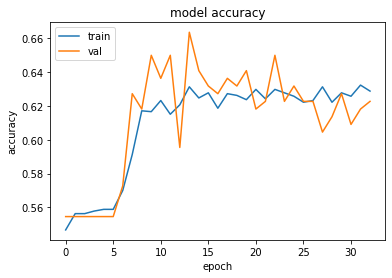

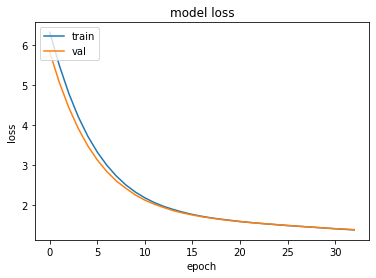

In [6]:
if not os.path.exists("results"):
    os.makedirs("results")
save_history(history, HISTORY_PATH)
plot_history(history, show=True, save_as="./results/" + RUN_NAME)